<h1 align="center">Welcome to YoutubeStatistics</h1>

### Required imports

In [147]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from src.yt_statistics import Statistics

plt.rcParams["figure.figsize"] = [16, 9]

### Fetching & shaping statistics from Youtube API

In order to get information about your liked videos you must pass authorization by your gmail account (connected to your Youtube account).

In [ ]:
my_stats = Statistics()

### Your last 3 liked videos

In [7]:
my_stats.liked_songs[:3]

[{'publishedAt': '2020-10-21T21:03:11Z',
  'title': 'How To Get The Jordan 1 DARK MOCHA ! | STOCK NUMBERS For The Jordan 1 Dark Mocha',
  'channelTitle': 'Keith Adam',
  'tags': ['how to get the jordan 1 dark mocha',
   'stock numbers for the jordan 1 dark mocha',
   'how to cop the jordan 1 dark mocha',
   'jordan 1 dark mocha',
   'dark mocha jordan 1',
   'retro 1 dark mocha',
   'how to buy the jordan 1 dark mocha',
   'jordan 1 mocha',
   'mocha jordan 1',
   'how to cop the mocha jordan 1',
   'how to get the mocha jordan 1',
   'how to buy the mocha jordan 1',
   'jordan 1 mocha stock',
   'dark mocha stock',
   'dark mocha 1',
   'jordan 1 dark mocha review',
   'dark mocha',
   'mocha jordan',
   'sneaker botting',
   'jordan 1',
   'snkrs'],
  'categoryId': '26'},
 {'publishedAt': '2020-10-21T13:00:22Z',
  'title': 'rummy x kvbsoon - "pierwszy raz"',
  'channelTitle': 'kvbsoon',
  'tags': ['nadzieja',
   'mrb',
   'medium rare',
   'medium rare boyz',
   'kvbsoon',
   'rummy'

### Utils functions

In [159]:
def plot_bar(data, labels, title='', x_label='', y_label=''):
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects = ax.bar(x, data, width)

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title, fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    
    interval = max(data) // 10 if max(data) > 10 else 1
    ax.set_yticks(np.arange(0, max(data) + interval, interval))

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 4)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel(rects)

In [160]:
def plot_pie(data, labels, title='', **kwargs):
    sizes = (data / np.sum(data)) * 100.0

    fig1, ax = plt.subplots()
    ax.pie(sizes, labels=None, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.legend(loc=3, labels=labels)
    ax.set_title(title, fontsize=20)
    ax.axis('equal')

    plt.show()

In [179]:
def plot_table(data, x_label='', y_label=''):
    fig1, ax = plt.subplots()
    table = ax.table(cellText=data,
             colLabels=[x_label, y_label],
             cellLoc='center',
             loc='center')
    table.scale(1,2)
    for (row, col), cell in table.get_celld().items():
        cell.set_text_props(fontproperties=FontProperties(size=18, weight='bold' if row == 0 else 'normal'))

    ax.axis('off')
    plt.show()

In [180]:
def plot_histograms(data, with_table=False, *args, **kwargs):
    """
        Plot bar chart + pie chart
        Data should be in shape [(label, count), (label, count) ...]
        passable args/kwargs are title, x_label, y_label
    """
    labels = np.array([row[0] for row in data])
    counts = np.array([row[1] for row in data])
    
    plot_bar(counts, labels, *args, **kwargs)
    if with_table:
        plot_table(data, kwargs['x_label'], kwargs['y_label'])
    plot_pie(counts, labels, *args, **kwargs)

## Your most liked categories

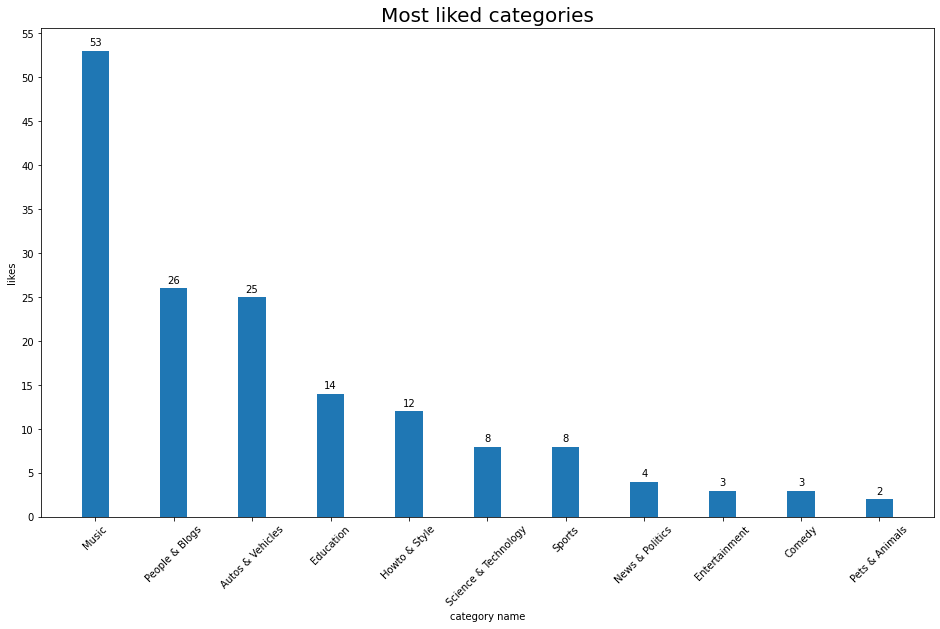

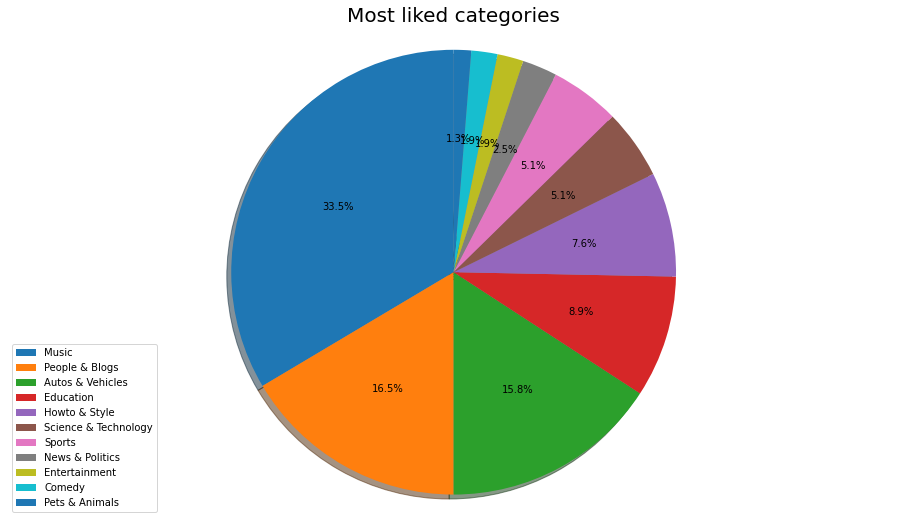

In [181]:
plot_histograms(my_stats.categories_histogram, title='Most liked categories', x_label='category name', y_label='likes')

## Your most liked categories from last month only

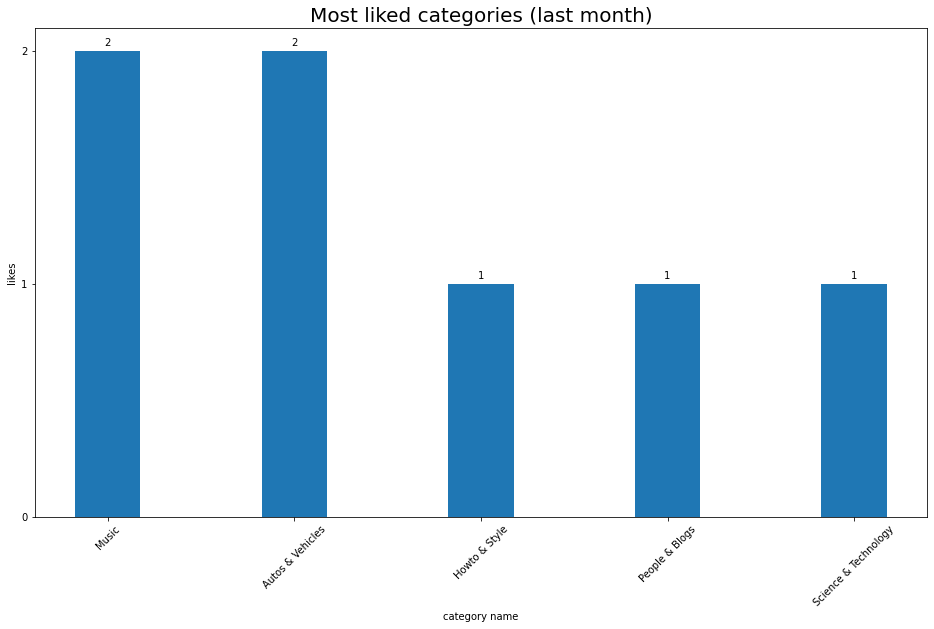

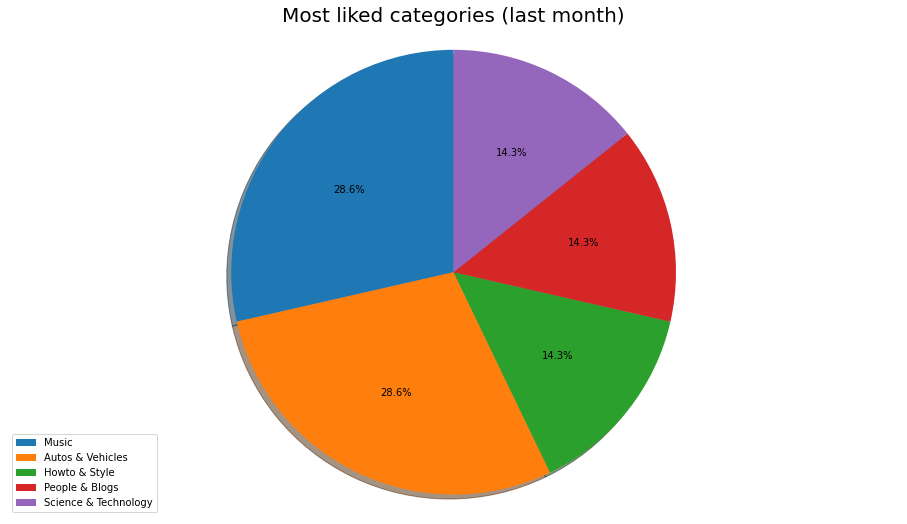

In [182]:
plot_histograms(
    my_stats.categories_histogram_last_month,
    title='Most liked categories (last month)',
    x_label='category name',
    y_label='likes')

## Your most favourited channels

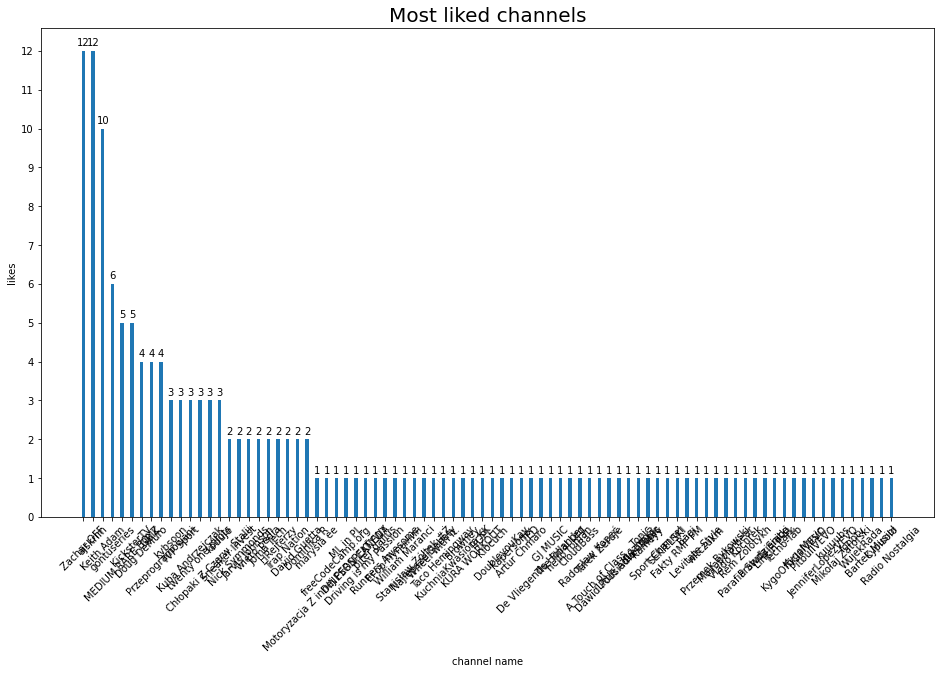

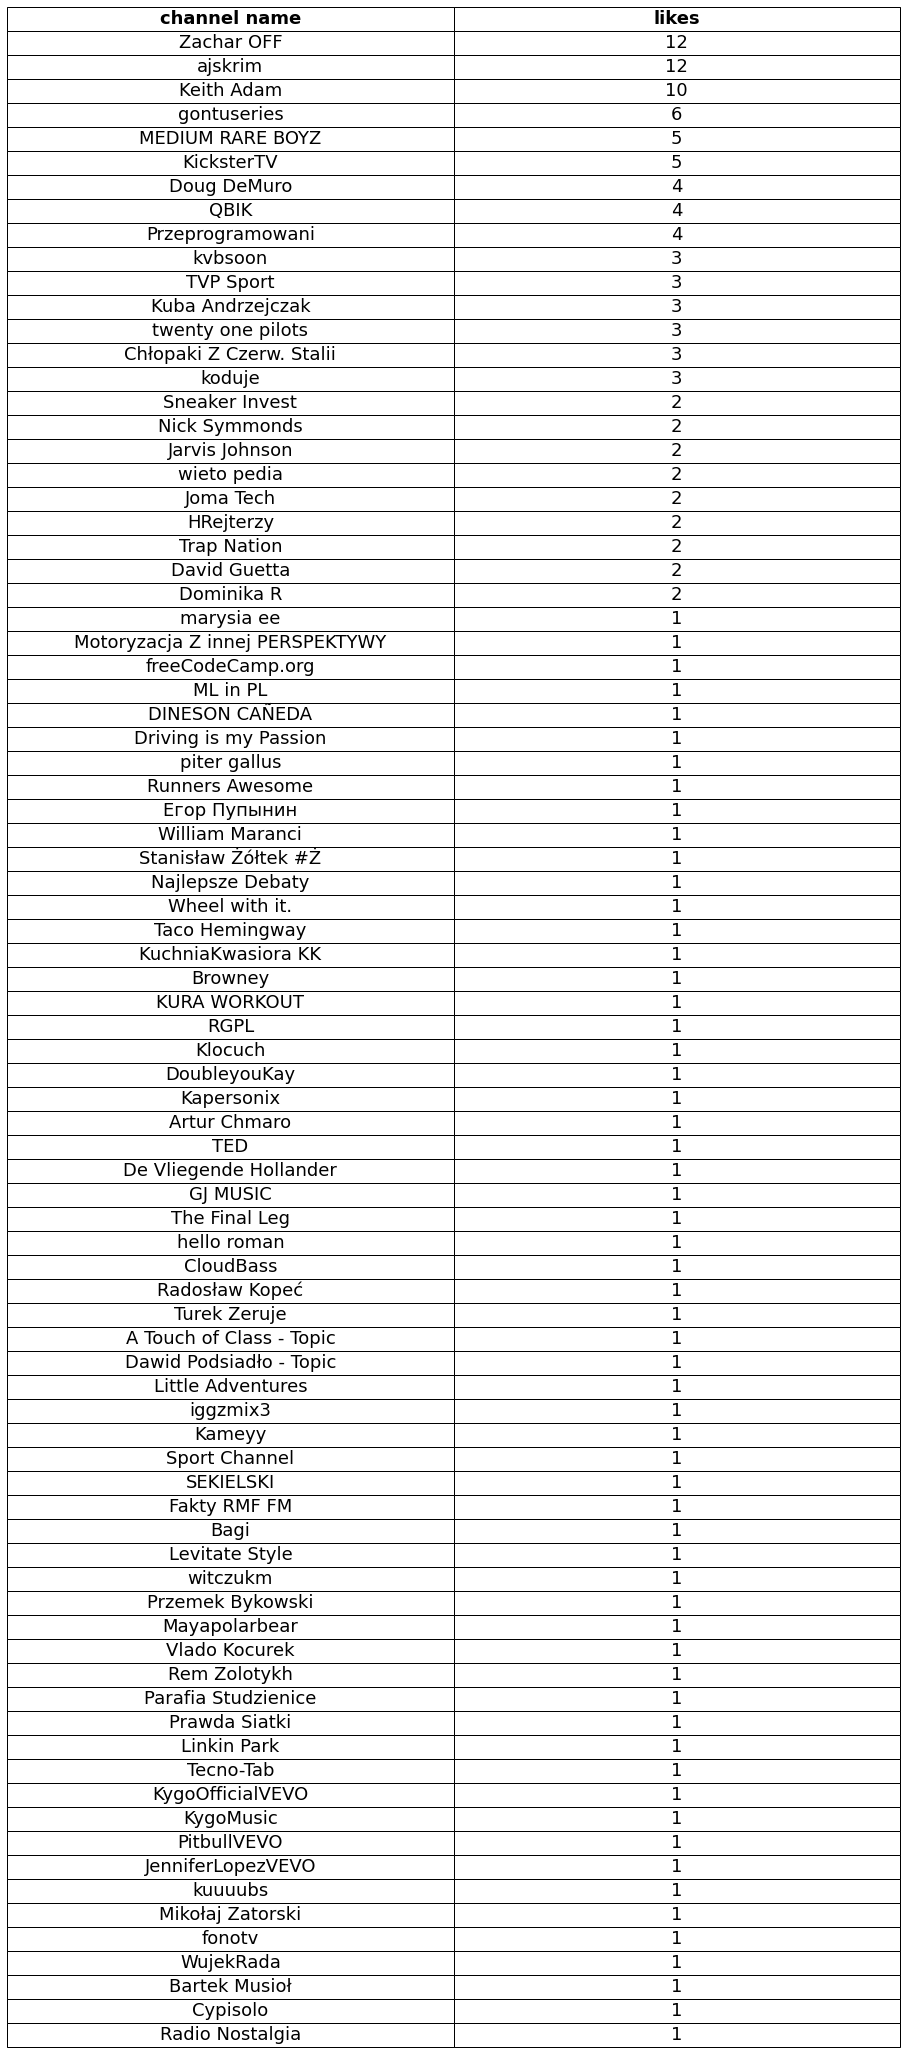

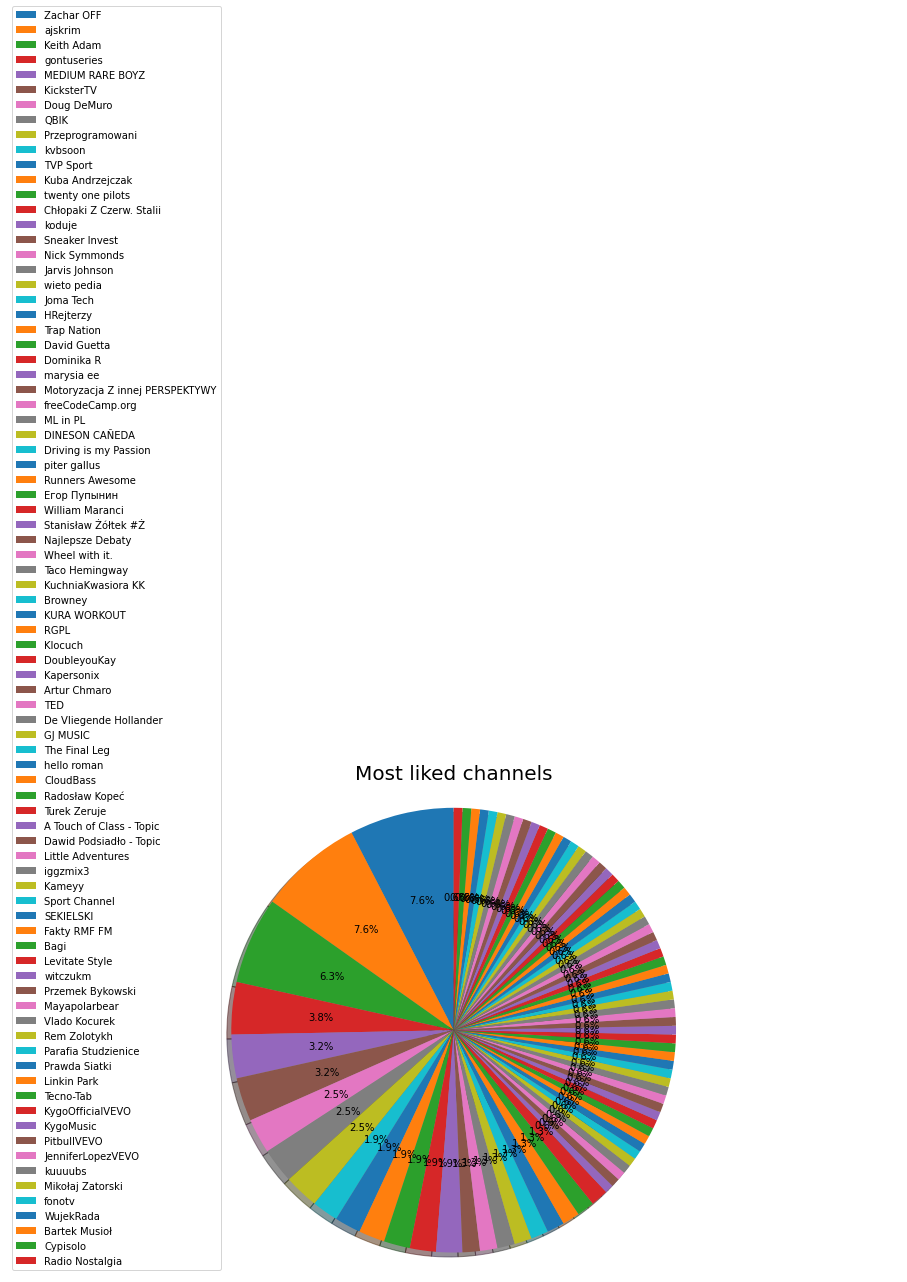

In [183]:
plot_histograms(
    my_stats.favourite_channels,
    with_table=True,
    title='Most liked channels',
    x_label='channel name',
    y_label='likes')

## Your most favourited channels from last month only

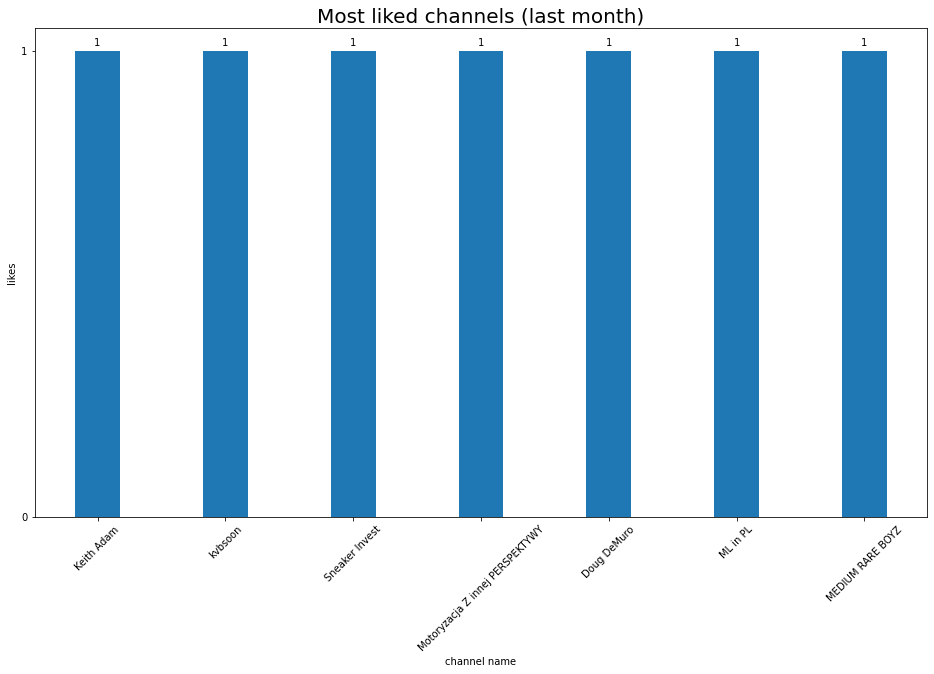

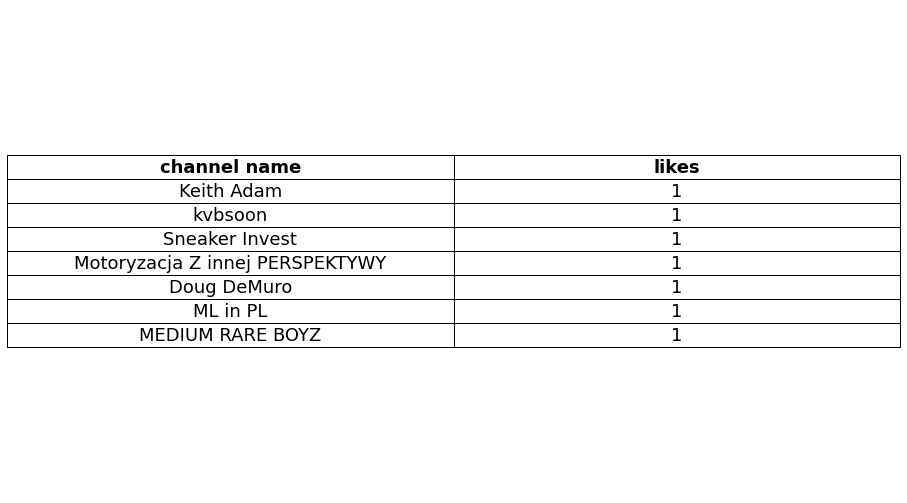

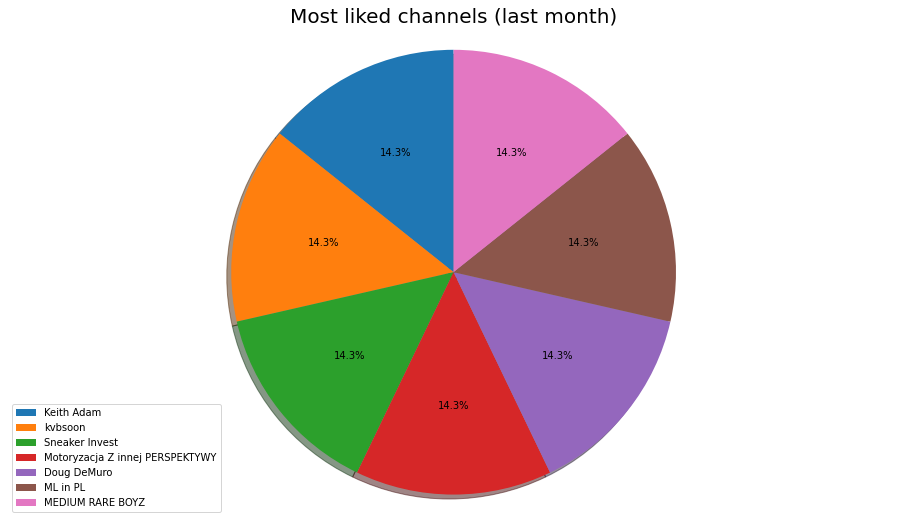

In [184]:
plot_histograms(
    my_stats.favourite_channels_last_month,
    with_table=True,
    title='Most liked channels (last month)',
    x_label='channel name',
    y_label='likes')